In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv


# <p style="text-align:center;color:#83042d">Machine Learning Workflow</p>  <br>  
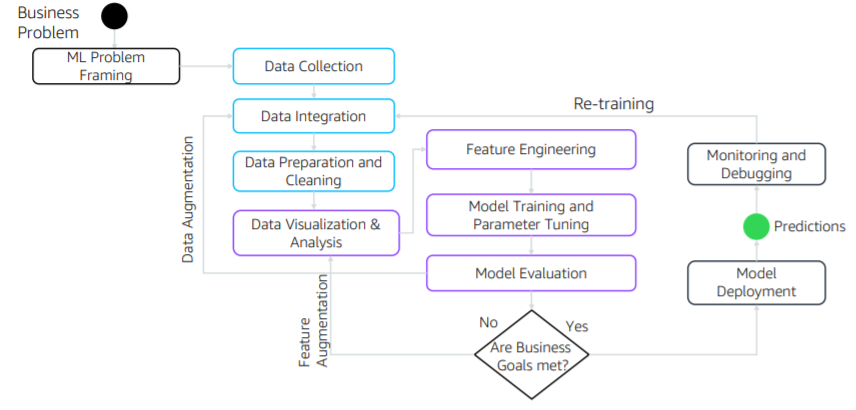 <br>

### Let us start of with Business Problem : Housing Prices
We are given data in a csv (comma separated values) file which consist of 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we have to predict the final price of each home.
<br><br>Data looks like this in a CSV file : 
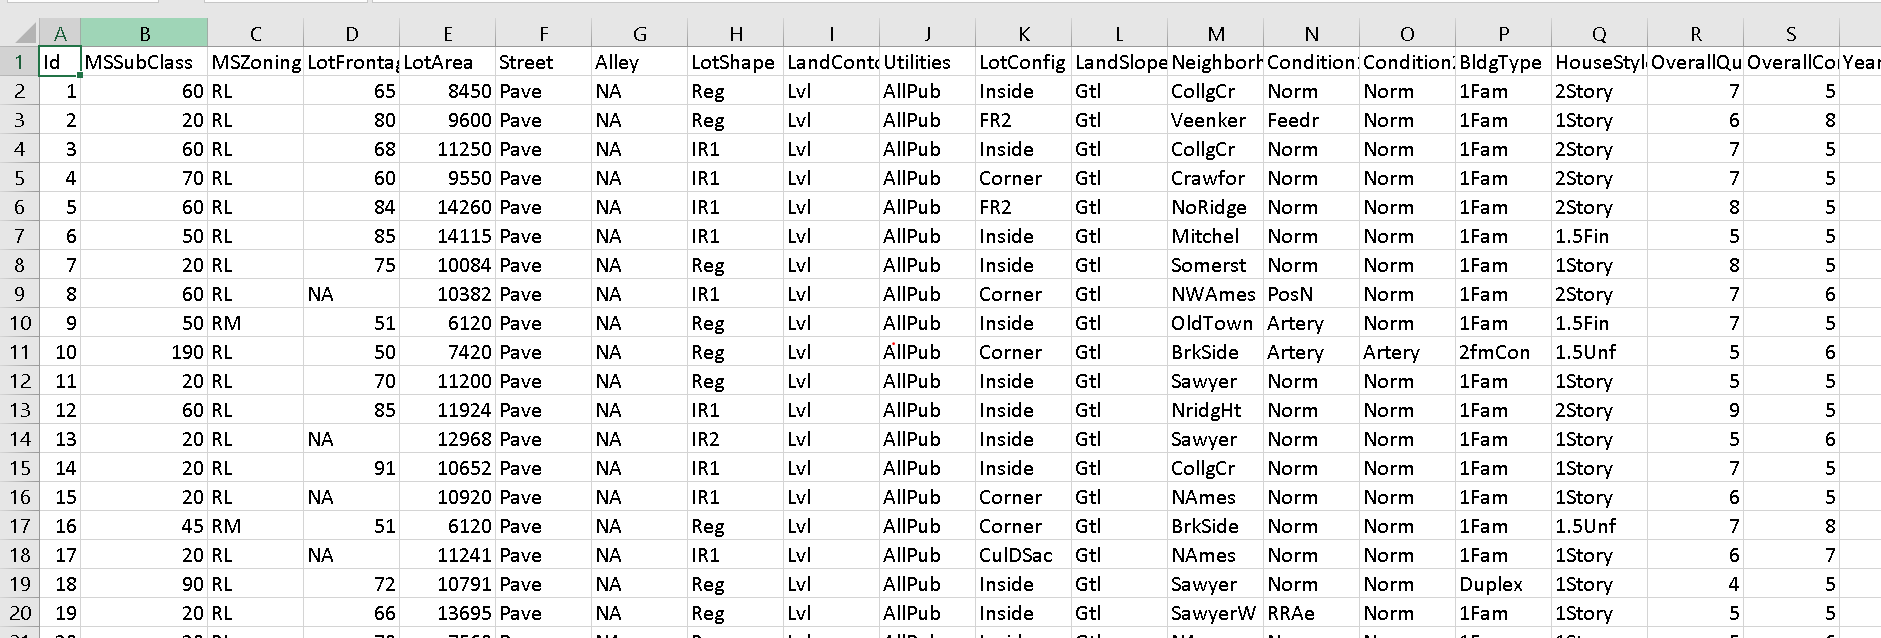

### Machine Learning Problem Framing
-> So based on the given data we need to predicte the selling price of the house.<br>
-> As the selling price can be any number like $279500 (for example) this ML problem comes under regression (will explain it down the notebook).<br>
-> Regression problem looks like this (example) : <br>
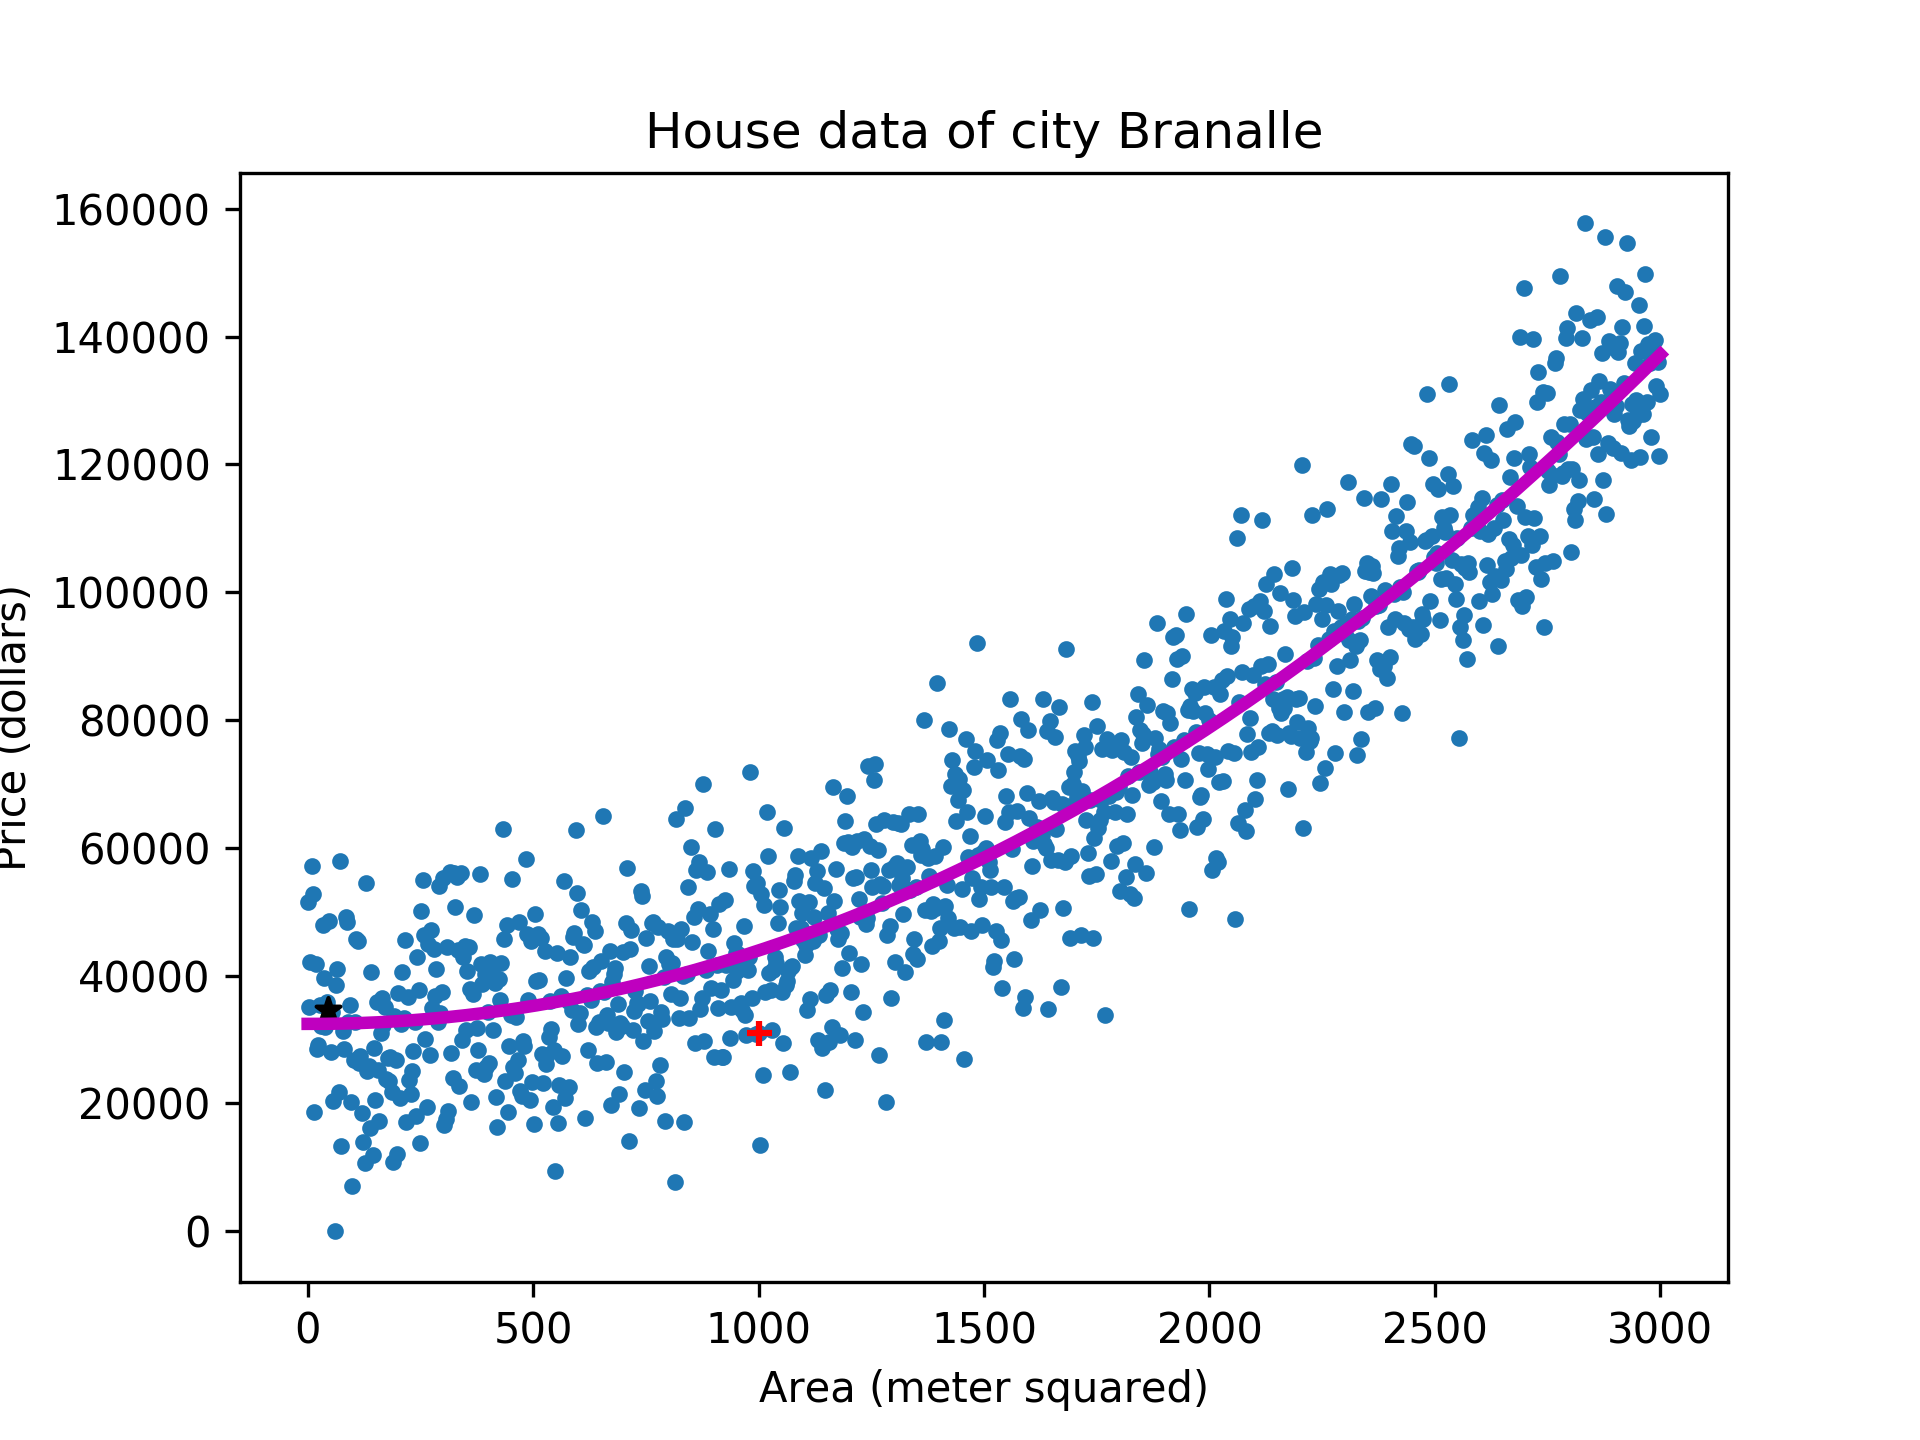
-> We will try out different regression algorithms on the data and pick the one which gives best prediction.

### Data Collection
-> The data used in this notebook is taken from https://www.kaggle.com/c/home-data-for-ml-course/overview <br>
-> We have to put the data in same folder where the notebook you are working is present.

### Data Integration
-> Some times we may have data present in many files, which is when we need to combine those into one file. <br>
-> We dont have to do it with Housing Price problem as complete data is provided in train and test csv files.<br>  (We shall see why they are provided in two files later)<br>
-> Now let us import the necessary libraries and data (which is present in same folder).

### Importing Libraries or Packages

In [125]:
import pandas as pd # Used for handling data
import numpy as np # Used for mathematical operations
import matplotlib.pyplot as plt # Used for data plots
from sklearn.impute import SimpleImputer # To fill missing values using Imputation
import math # General Math operations are present here.
import seaborn as sns # Used for Data visualizations like creating charts of various kinds
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Used for LabelEncoding and One-Hot encoding


In [126]:
# save filepath to variable for easier access
housing_price_file_path = '/kaggle/input/home-data-for-ml-course/train.csv'
# read the data and store data in DataFrame titled housing_data
housing_data = pd.read_csv(housing_price_file_path) 
housing_data = housing_data.drop(housing_data.columns[0], axis=1)

In [127]:
x_total = housing_data.iloc[:,:-1]
y = housing_data.iloc[:,-1]
print(x_total)
type(y)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...  

pandas.core.series.Series

### Data preparation and cleaning (also called Data Preprocessing)
-> Data preprocessing is where you study the properties of data and Try to get insight from it.


In [128]:
# We take a peek at the training data with the head() method
x_total.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [129]:
# print a summary of the data in Housing price data
x_total.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


The results show 8 numbers for each column in your original dataset. <br>
Results are given only for colmns with numerical data.<br>
-> count :  shows how many rows have non-missing values (click here to know about missing data : [Click](https://machinelearningmastery.com/handle-missing-data-python/#:~:text=Data%20can%20have%20missing%20values,support%20data%20with%20missing%20values.)) <br>
-> mean : average of values present in particular column <br>
-> std : the standard deviation, which measures how numerically spread out the values are. <br>
-> To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [130]:
len(x_total.columns)

79

##### dealing with missing values : There are many ways data can end up with missing values. 
Three Approaches<br>
1) Drop Columns with Missing Values<br>
    Use this option when you have lots of missing data in a column.<br>
2) Imputation<br>
    In this method we fill the missing value with a number. For instance, we can fill in the mean value along each column.<br>
3) Fill with reasonable values by observation.<br>
-> We can find "LotFrontage" and "MasVnrArea" columns to be having missing data above. We shall use Imputation to fill.<br>
-> Our collected data can heve some missing values with "NaN" tag. We cannot give it to our model, as it does not understand it.<br>
-> Pandas provides some methods specific to missing data. To select NaN entries you can use "pd.isnull()"

In [131]:
x_total.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Length: 79, dtype: bool

In [132]:
# housing_data.isnull().any() : gives us which columns have missing values 
# housing_data.columns : gives us the columns in housing data
# miscols : columns which have missing data
mis_cols = x_total.columns[x_total.isnull().any()]
# mis_cols_test = test.columns[test.isnull().any()]
mis_cols = list(mis_cols)
# mis_cols_test = list(mis_cols_test)
print(x_total[mis_cols].isnull().sum())

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [133]:
# Let us remove all the columns which have missing values greater than 100
# you get error if you run this cell again, because in first run we have deleted few columns
cols = x_total[mis_cols].isnull().sum() > 100

remove_cols = []
for i in range(len(cols)):
    if cols[i]==True:
        remove_cols.append(mis_cols[i])
        
print(remove_cols)
x_total.drop(remove_cols, axis=1, inplace =True)

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [134]:
# After removing few columns we have to replace the missing values in numerical columns with mean value
mis_cols = x_total.columns[x_total.isnull().any()]
print('All columns with missing values less than 100 : ',mis_cols)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = x_total[mis_cols].select_dtypes(include=numerics)
newcol = newdf.columns
print()
print('Numerical columns with missing values less than 100 : ',newcol)
# we fill the missing cells using SimpleImputer class
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_total[newcol])
x_total[newcol] = imp.transform(x_total[newcol])

All columns with missing values less than 100 :  Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

Numerical columns with missing values less than 100 :  Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')


In [136]:
# After filling Numerical columns, let us fill categorical columns with most frequent string in column.
numerics = ['O']
mis_cols = x_total.columns[x_total.isnull().any()]
newdf = x_total[mis_cols].select_dtypes(include=numerics)
newcol = newdf.columns
print(newcol)
print()
x_total[newcol].dtypes
imp2 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_total[newcol] = imp2.fit_transform(x_total[newcol])

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')



In [139]:
print(x_total.nunique())
# If we have less than 10 unique values we can avoid considering the feature as most of the cells contain the same result.
less_unique_cols = list(x_total.nunique() < 10)
# print(less_unique_cols)
remove_cols = []
for j in range(len(less_unique_cols)):
    if less_unique_cols[j]==True:
        remove_cols.append(x_total.columns[j])

print()
print('the columns which should be deleted : ',remove_cols)
x_total.drop(remove_cols, axis=1, inplace =True)
x_total.columns

MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
LotShape            4
                 ... 
MiscVal            21
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 73, dtype: int64

the columns which should be deleted :  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'YrSold', 'SaleType', 'SaleCondition']


Index(['MSSubClass', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold'],
      dtype='object')

### Data Visualisation
For the Data visualization we will mostly use seaborn (a powerful but easy-to-use data visualization tool). <br>
We can generate different charts with short and simple code, making seaborn much faster and easier to use than many other data visualization tools (such as Excel, for instance). 
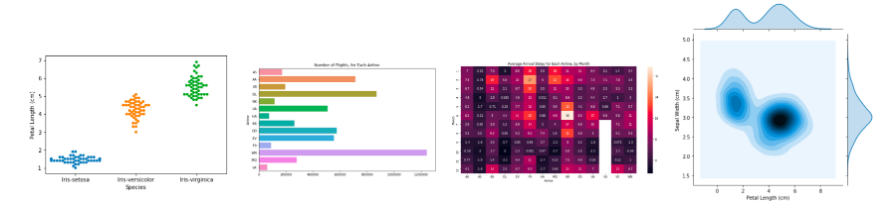 <br>

In [141]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
print("Setup Complete")

Setup Complete


### scatter plot
The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values.<br>
We will use it to see how each feature relates to the class.

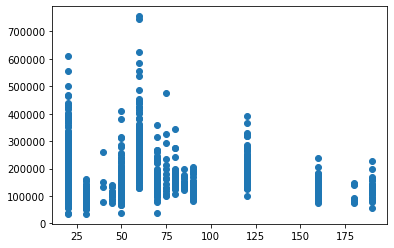

In [142]:
# Let us do it 
plt.scatter(housing_data.iloc[:,0],housing_data.iloc[:,-1],marker='o')

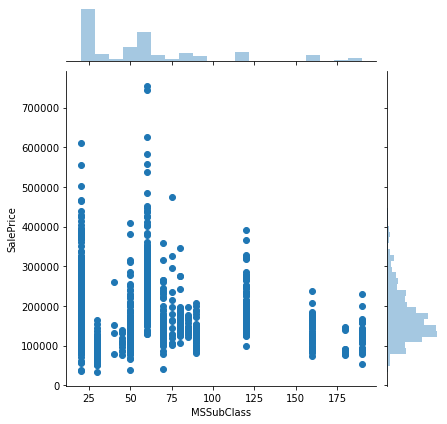

In [143]:
sns.jointplot(housing_data.iloc[:,0],housing_data.iloc[:,-1],data=housing_data)

### Boxplot 
When we wanted to know the spread and median of data we use boxplot. 

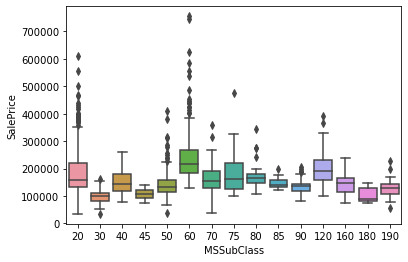

In [144]:
sns.boxplot(x=housing_data.iloc[:,0],y=housing_data.iloc[:,-1],data=housing_data)

In [145]:
x_total.corr()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold
MSSubClass,1.000000,-0.139781,0.032628,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,...,0.040380,0.080187,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,-0.007683,-0.013585
LotArea,-0.139781,1.000000,0.105806,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,...,0.190015,-0.024812,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.038068,0.001205
OverallQual,0.032628,0.105806,1.000000,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,...,0.427452,0.518018,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,-0.031406,0.070815
YearBuilt,0.027850,0.014228,0.572323,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,...,0.095589,0.780555,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,-0.034383,0.012398
YearRemodAdd,0.040581,0.013788,0.550684,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,...,0.191740,0.618130,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,-0.010286,0.021490
MasVnrArea,0.022895,0.103960,0.410238,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,...,0.280027,0.249367,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,-0.029815,-0.005940
BsmtFinSF1,-0.069836,0.214103,0.239666,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,...,0.044316,0.150338,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.003571,-0.015727
BsmtFinSF2,-0.065649,0.111170,-0.059119,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,...,-0.035227,-0.087126,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.004940,-0.015211
BsmtUnfSF,-0.140759,-0.002618,0.308159,0.149040,0.181133,0.114184,-0.495251,-0.209294,1.000000,0.415360,...,0.250647,0.186098,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.023837,0.034888
TotalBsmtSF,-0.238518,0.260833,0.537808,0.391452,0.291066,0.362452,0.522396,0.104810,0.415360,1.000000,...,0.285573,0.311700,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,-0.018479,0.013196


### Dealing with categorical variable (columns with non-numerical data)
You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first. <br>
In present dataset we have : 'Neighborhood', 'Exterior1st', 'Exterior2nd' as categorical columns. <br>
We have three approaches : <br>
1)  Drop Categorical Variables :  This approach will only work well if the columns did not contain useful information.<br>
2) Label Encoding : Label encoding assigns each unique value to a different string.<br>
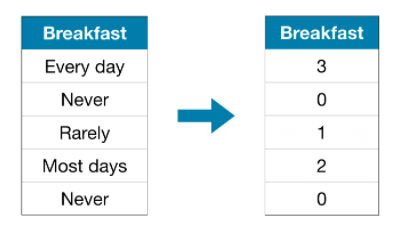
But when we have ordinal variables [CheckOut](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20allows,work%20with%20categorical%20data%20directly.&text=When%20a%20one%20hot%20encoding,predictions%20than%20a%20single%20label.)<br>
3) One-Hot Encoding : One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.<br>

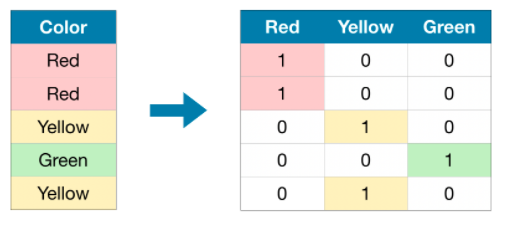

In [146]:
# columns which have categorical variables
dtypes = ['O']
cate = x_total.select_dtypes(include=dtypes)
cate = list(cate)
print(cate)
x_total.loc[:, cate].columns
print(cate[0])
x_total.drop(cate, axis = 1,inplace =True)
x_total.columns

['Neighborhood', 'Exterior1st', 'Exterior2nd']
Neighborhood


Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold'],
      dtype='object')

In [147]:
x_total.isnull().any()

MSSubClass       False
LotArea          False
OverallQual      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
TotRmsAbvGrd     False
GarageYrBlt      False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
MiscVal          False
MoSold           False
dtype: bool

In [150]:
x_total

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold
0,60,8450,7,2003,2003,196.0,706,0,150,856,...,8,2003.0,548,0,61,0,0,0,0,2
1,20,9600,6,1976,1976,0.0,978,0,284,1262,...,6,1976.0,460,298,0,0,0,0,0,5
2,60,11250,7,2001,2002,162.0,486,0,434,920,...,6,2001.0,608,0,42,0,0,0,0,9
3,70,9550,7,1915,1970,0.0,216,0,540,756,...,7,1998.0,642,0,35,272,0,0,0,2
4,60,14260,8,2000,2000,350.0,655,0,490,1145,...,9,2000.0,836,192,84,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,1999,2000,0.0,0,0,953,953,...,7,1999.0,460,0,40,0,0,0,0,8
1456,20,13175,6,1978,1988,119.0,790,163,589,1542,...,7,1978.0,500,349,0,0,0,0,0,2
1457,70,9042,7,1941,2006,0.0,275,0,877,1152,...,9,1941.0,252,0,60,0,0,0,2500,5
1458,20,9717,5,1950,1996,0.0,49,1029,0,1078,...,5,1950.0,240,366,0,112,0,0,0,4


In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_total, y, test_size=0.2, random_state=42)

In [158]:
# linear regression, random forest regressor, XGB regressor, 

### Model Training
We use Regression models to find the Price of House.<br>
But which model is the best. So, here comes the iterative process involved in Machine Learning.<br>
In an itertative process, we try different models with different settings, and picks up the one which performs the best based on various evaluation steps.

#### Multiple Linear Regression
You all might be familiar with Linear equations in algebra. Linear regression is similar to it. <br>
Basically this equation : y = q0 + q1*(x1)


In [159]:
x_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold'],
      dtype='object')

In [160]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

print(y_train.shape)

regr.fit(x_train,y_train)


(1168,)


LinearRegression()

In [162]:
y_pred = regr.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test)

23146.23048366296

In [ ]:
# XGBoost 

In [163]:
from sklearn import datasets, ensemble
params = {'n_estimators': 1000,
          'max_depth': 10,
          'min_samples_split': 8,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg2 = ensemble.GradientBoostingRegressor(**params)
reg2.fit(x_train, y_train)
y_pred = reg2.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test)


20080.075703974282

In [ ]:
# Random Forest

In [164]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

Y_pred = regressor.predict(x_test)  # test the output by changing values 
Y_pred
mean_absolute_error(Y_pred, y_test)



18866.526255707762